In [1]:
import maelzel.partialtracking as pt
from sndfileio import *
import bpf4

In [2]:
samples, sr = sndread("/home/em/Lib/snd/samples/speech/colours-german-male-1.flac")

In [3]:
sp = pt.analyze(samples, sr=sr, resolution=50, windowsize=60, hoptime=1/120)

In [4]:
sp.play(speed=0.2)




--Csound version 6.19 (double samples) Oct 30 2023
[commit: 79e5d31bea441e5289073319ab2b1e42d01814b9]
libsndfile-1.2.0
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 512 sample-frame blocks
reading 4096-byte blks of shorts from adc:Built-in Audio Pro: (RAW)
writing 1024 sample blks of 64-bit floats to dac:Built-in Audio Pro:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ .playPartials=501.0002 start=0.393 dur=-1.000 p4=104 ifn=0 iskip=3066 inumrows=811 inumcols=0.2 kspeed=0 kloop=0 kminfreq=0 kmaxfreq=6 iflags=0 istart=0 istop=1 kfreqscale=1 ichan=1 kbwscale=1 kgain=0)

In [5]:
p = max(sp.partials, key=lambda p: p.numbreakpoints * (p.meanfreq() < 3000))
p

Partial(start=3.9721, end=4.8362, numbreakpoints=107, meanfreq=217.7, meanamp=-28.3dB

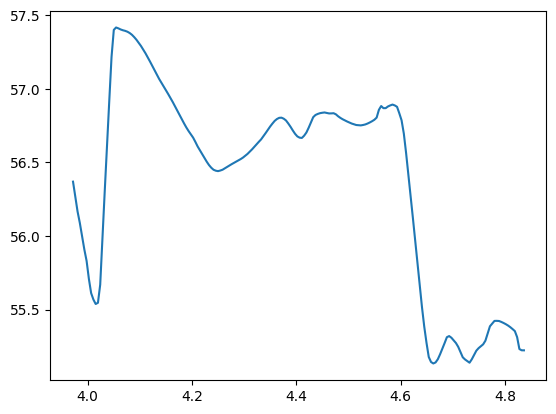

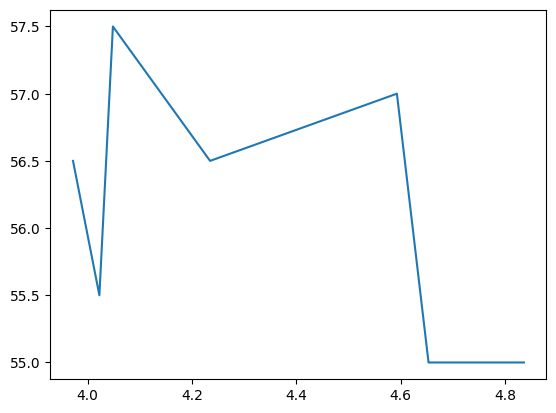

(None, None)

In [6]:
from maelzel import pitchtoolsnp as ptnp
p2 = p.simplified(0.4)
freqs = p2.freqs
pitches = ptnp.f2m(freqs)
quants = (pitches * 2).round() / 2
quant = bpf4.core.Linear(p2.times, quants)
p.freqbpf().f2m().plot(), quant.plot()

In [22]:
freq2.round(

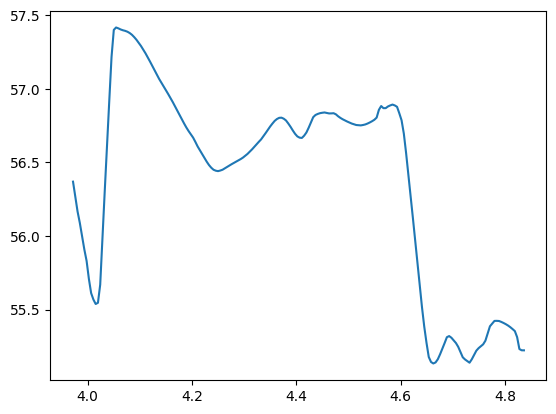

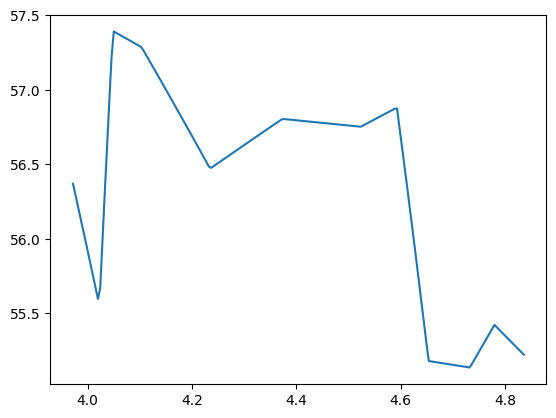

(None, None)